<a href="https://colab.research.google.com/github/sudama-inc/EDA-with-Pandas-and-Numpy/blob/main/Exploratory_Data_Analysis_(EDA)_with_Pandas_and_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
app = pd.read_csv("/content/drive/MyDrive/Datasets/application_data.csv")
prev_app = pd.read_csv("/content/drive/MyDrive/Datasets/previous_application.csv")

In [4]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
app.shape

(307511, 122)

In [7]:
msng_info = pd.DataFrame(app.isnull().sum().sort_values()).reset_index()
msng_info.rename(columns={'index':'col_name',0:'null_count'}, inplace=True)


In [8]:
msng_info['msng_pct'] = msng_info['null_count']/app.shape[0]*100
msng_info.head()

,col_name,null_count,msng_pct
0,SK_ID_CURR,0,0.0
1,HOUR_APPR_PROCESS_START,0,0.0
2,REG_REGION_NOT_WORK_REGION,0,0.0
3,LIVE_REGION_NOT_WORK_REGION,0,0.0
4,REG_CITY_NOT_LIVE_CITY,0,0.0


In [9]:
msng_col = msng_info[msng_info['msng_pct']>=40]['col_name'].to_list()
app_msng_rmvd = app.drop(labels=msng_col, axis=1)
app_msng_rmvd.shape

(307511, 73)

In [10]:
app_msng_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
flag_col = []

for col in app_msng_rmvd.columns:
  if col.startswith('FLAG_'):
    flag_col.append(col)
flag_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [12]:
len(flag_col)

28

In [13]:
flag_tgt_col = app_msng_rmvd[flag_col + ['TARGET']]
flag_tgt_col.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


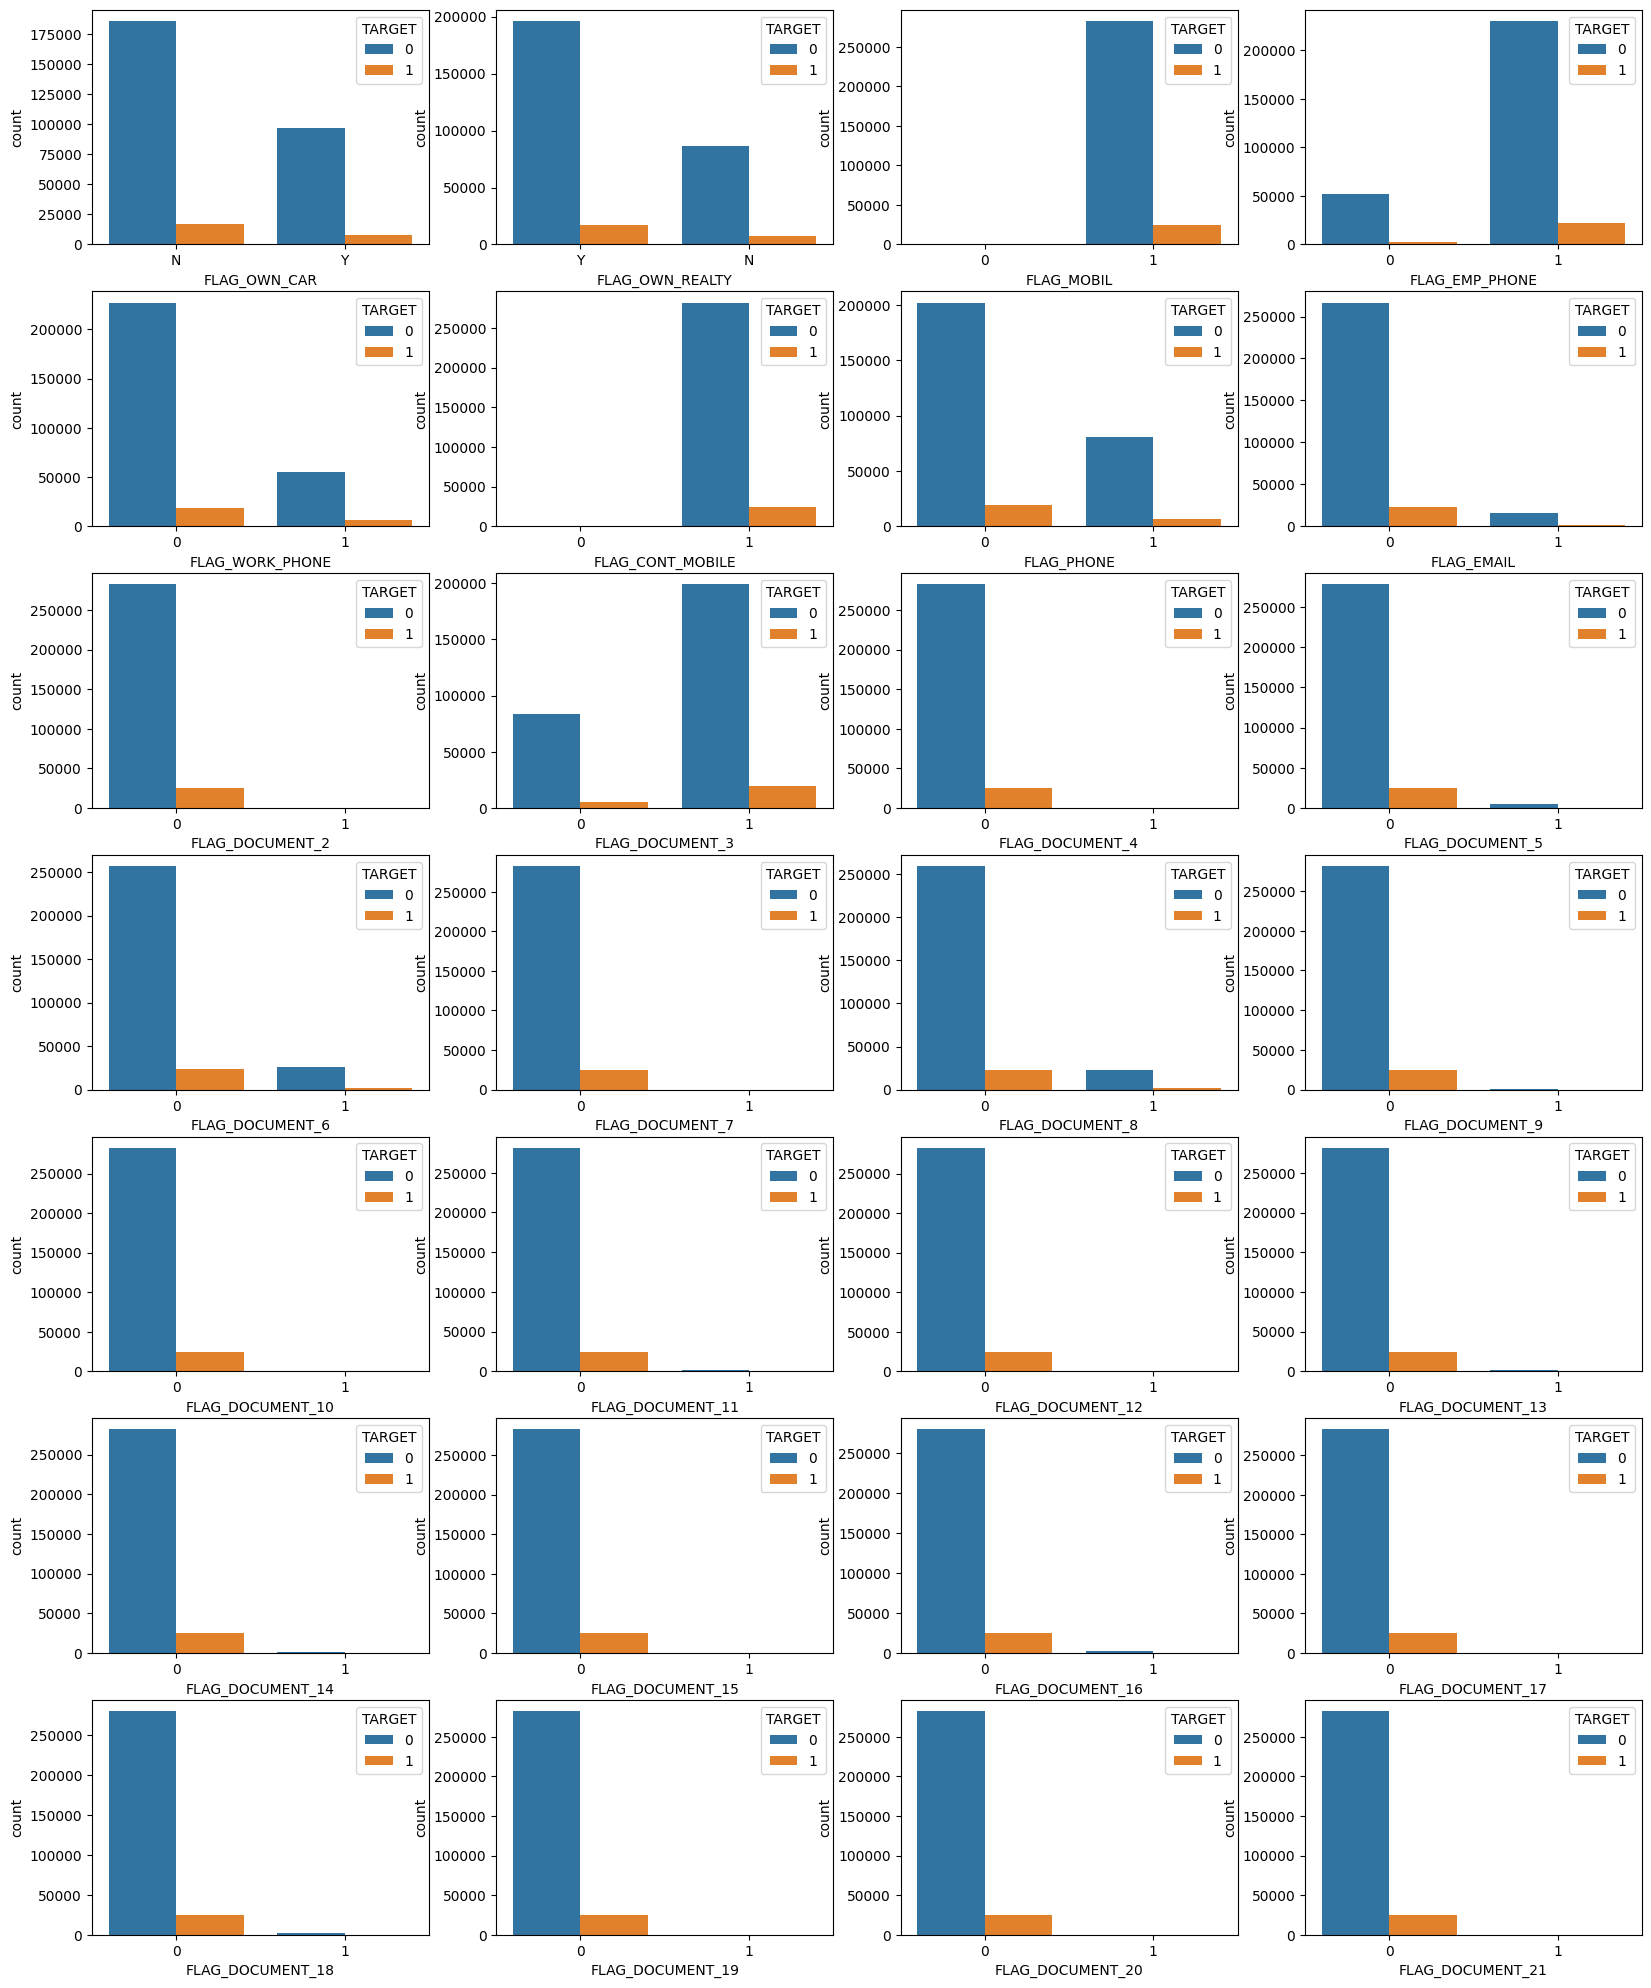

In [14]:
plt.figure(figsize=(20,25))

for i, col in enumerate(flag_col):
  plt.subplot(7,4,i+1)
  sns.countplot(data=flag_tgt_col, x=col, hue='TARGET')

In [15]:
flg_corr = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','TARGET']

flg_corr_df = app_msng_rmvd[flg_corr]
flg_corr_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,N,Y,1,1,0,1,1,0,1
1,N,N,1,1,0,1,1,0,0
2,Y,Y,1,1,1,1,1,0,0
3,N,Y,1,1,0,1,0,0,0
4,N,Y,1,1,0,1,0,0,0


In [16]:
flg_corr_df.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
N    202924
Y    104587
dtype: int64

In [17]:
flg_corr_df['FLAG_OWN_CAR'] = flg_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
flg_corr_df['FLAG_OWN_REALTY'] = flg_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})


<ipython-input-17-2be177fb552a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flg_corr_df['FLAG_OWN_CAR'] = flg_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
<ipython-input-17-2be177fb552a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flg_corr_df['FLAG_OWN_REALTY'] = flg_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})


In [18]:
flg_corr_df.groupby(['FLAG_OWN_CAR']).size()


FLAG_OWN_CAR
0    202924
1    104587
dtype: int64

In [19]:
corr_df = round(flg_corr_df.corr(), 2)


<Axes: >

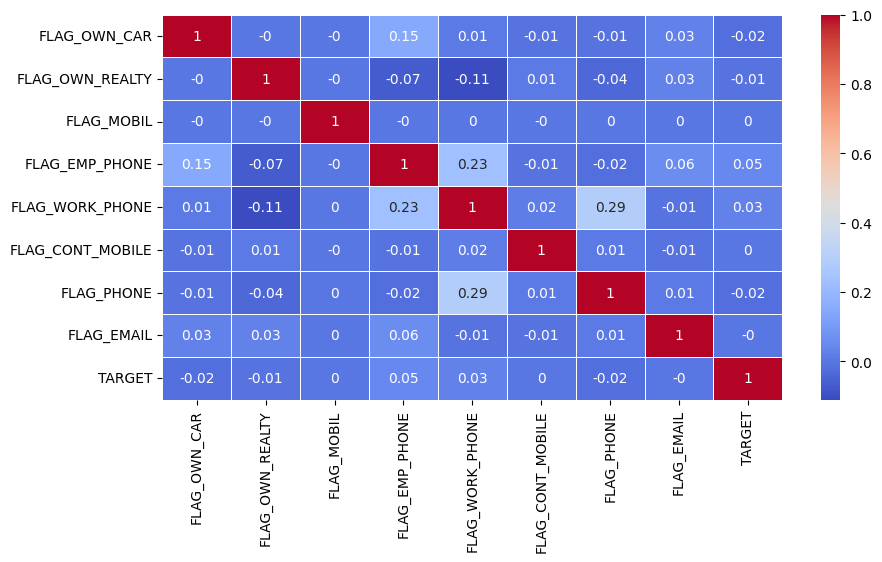

In [20]:
plt.figure(figsize=(10,5))

sns.heatmap(corr_df, cmap='coolwarm', linewidths=.5, annot=True)

In [21]:
app_flg_rmvd = app_msng_rmvd.drop(labels=flag_col, axis=1)
app_flg_rmvd.shape

(307511, 45)

<Axes: >

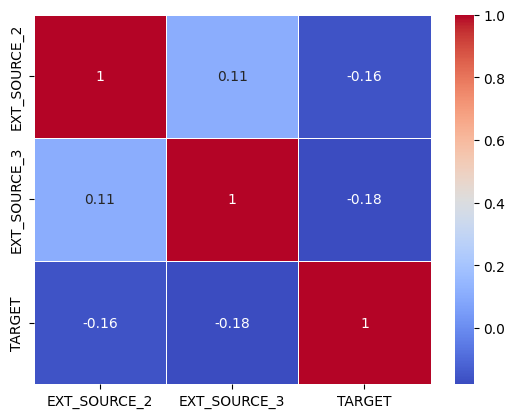

In [22]:
sns.heatmap(data=round(app_flg_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(), 2),cmap='coolwarm', linewidth=.5, annot=True)

In [23]:
app_score_col_rmvd = app_flg_rmvd.drop(['EXT_SOURCE_2','EXT_SOURCE_3'], axis=1)
app_score_col_rmvd.shape

(307511, 43)

In [24]:
app_score_col_rmvd.isnull().sum().sort_values() / app_score_col_rmvd.shape[0]


SK_ID_CURR                     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT           0.000000
NAME_HOUSING_TYPE              0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
REGION_POPULATION_RELATIVE     0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
CODE_GENDER                    0.000000
NAME_INCOME_TYPE               0.000000


In [25]:
app_score_col_rmvd['CNT_FAMMEMBERS'] = app_score_col_rmvd['CNT_FAM_MEMBERS'].fillna((app_score_col_rmvd['CNT_FAM_MEMBERS'].mode()[0]))


In [26]:
app_score_col_rmvd['CNT_FAMMEMBERS'].isnull().sum()


0

In [27]:
app_score_col_rmvd['OCCUPATION_TYPE'] = app_score_col_rmvd['OCCUPATION_TYPE'].fillna((app_score_col_rmvd['OCCUPATION_TYPE'].mode()[0]))

In [28]:
app_score_col_rmvd['OCCUPATION_TYPE'].isnull().sum()

0

In [29]:
app_score_col_rmvd['NAME_TYPE_SUITE'].isnull().sum()

1292

In [30]:
app_score_col_rmvd['AMT_ANNUITY'] = app_score_col_rmvd['AMT_ANNUITY'].fillna((app_score_col_rmvd['AMT_ANNUITY'].mean()))

In [31]:
app_score_col_rmvd['AMT_ANNUITY'].isnull().sum()

0

In [32]:
amt_req_col = []

for col in app_score_col_rmvd.columns:
  if col.startswith('AMT_REQ_CREDIT_BUREAU'):
    amt_req_col.append(col)

amt_req_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [33]:
for col in amt_req_col:
  app_score_col_rmvd[col] = app_score_col_rmvd[col].fillna((app_score_col_rmvd[col].median()))

In [34]:
# app_score_col_rmvd.isnull().sum().sort_values()

In [35]:
app_score_col_rmvd['AMT_GOODS_PRICE'] = app_score_col_rmvd['AMT_GOODS_PRICE'].fillna((app_score_col_rmvd['AMT_GOODS_PRICE'].median()))

In [36]:
app_score_col_rmvd.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_FAMMEMBERS
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [37]:
days_col = []
for col in app_score_col_rmvd.columns:
  if col.startswith('DAYS'):
    days_col.append(col)
days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [38]:
for col in days_col:
  app_score_col_rmvd[col] = abs(app_score_col_rmvd[col])


In [39]:
app_score_col_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_FAMMEMBERS
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
# app_score_col_rmvd.nunique().sort_values()

In [41]:
app_score_col_rmvd['OBS_30_CNT_SOCIAL_CIRCLE'].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,
        19.,  18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,
        30.])

In [42]:
# ### Outlier detection & treatment

app_score_col_rmvd['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

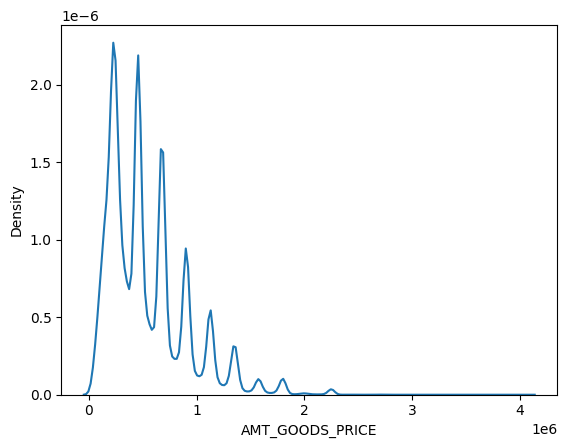

In [43]:
sns.kdeplot(data=app_score_col_rmvd, x='AMT_GOODS_PRICE')

<Axes: xlabel='AMT_GOODS_PRICE'>

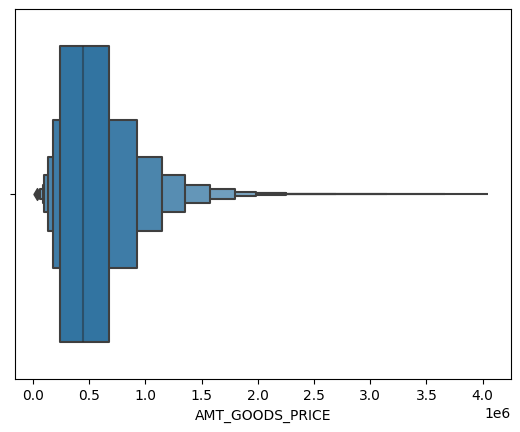

In [44]:
sns.boxenplot(data=app_score_col_rmvd,x='AMT_GOODS_PRICE')

In [45]:
app_score_col_rmvd['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [46]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges = ['0-100K','100k-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K'
          ,'700K-800K','800K-900K','Above 900K']

In [47]:
app_score_col_rmvd['AMT_GOODS_PRICE_RANGE'] = pd.cut(app_score_col_rmvd['AMT_GOODS_PRICE'], bins, labels=ranges)

In [48]:
app_score_col_rmvd.groupby(['AMT_GOODS_PRICE_RANGE']).size()

AMT_GOODS_PRICE_RANGE
0-100K         8709
100k-200K     32956
200K-300K     62761
300K-400K     21219
400K-500K     57251
500K-600K     13117
600K-700K     40024
700K-800K      8110
800K-900K     21484
Above 900K    41880
dtype: int64

In [49]:
app_score_col_rmvd['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

app_score_col_rmvd['AMT_INCOME_TOTAL'].max()

117000000.0

In [50]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K','350K-400K'
          ,'Above 400K']

app_score_col_rmvd['AMT_INCOME_TOTAL_RANGE'] = pd.cut(app_score_col_rmvd['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [51]:
app_score_col_rmvd.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

AMT_INCOME_TOTAL_RANGE
0-100K        63698
100K-150K     91591
150K-200K     64307
200K-250K     48137
250K-300K     17039
300K-350K      8874
350K-400K      5802
Above 400K     8063
dtype: int64

In [52]:
app_score_col_rmvd['AMT_INCOME_TOTAL_RANGE'].isnull().sum()

0

In [53]:
app_score_col_rmvd['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

app_score_col_rmvd['AMT_CREDIT'].max()

4050000.0

In [54]:
bins = [0,200000,400000,600000,800000,900000,1000000,2000000,3000000,4050000]
ranges = ['0-200K','200K-400K','400K-600K','600K-800K','800K-900K','900K-1M','1M-2M','2M-3M','Above 3M']

app_score_col_rmvd['AMT_CREDIT_RANGE'] = pd.cut(app_score_col_rmvd['AMT_CREDIT'],bins,labels=ranges)


In [55]:
app_score_col_rmvd.groupby(['AMT_CREDIT_RANGE']).size()

AMT_CREDIT_RANGE
0-200K       36144
200K-400K    81151
400K-600K    66270
600K-800K    43242
800K-900K    21792
900K-1M       8927
1M-2M        47956
2M-3M         1997
Above 3M        32
dtype: int64

In [56]:
app_score_col_rmvd['AMT_CREDIT'].isnull().sum()

0

In [57]:
app_score_col_rmvd['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

app_score_col_rmvd['AMT_ANNUITY'].max()

258025.5

In [58]:
bins = [0,25000,50000,100000,150000,200000,258025.5]
ranges = ['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K']

app_score_col_rmvd['AMT_ANNUITY_RANGE'] = pd.cut(app_score_col_rmvd['AMT_ANNUITY'],bins,labels=ranges)


In [59]:
app_score_col_rmvd.groupby(['AMT_ANNUITY_RANGE']).size()

AMT_ANNUITY_RANGE
0-25K         154867
25K-50K       131347
50K-100K       20792
100K-150K        437
150K-200K         32
Above 200K        36
dtype: int64

In [60]:
app_score_col_rmvd['AMT_ANNUITY_RANGE'].isnull().sum()

0

In [61]:
app_score_col_rmvd['DAYS_EMPLOYED'].agg(['min','max','median'])

app_score_col_rmvd['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])

0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.50      2219.0
0.60      3032.0
0.70      4435.0
0.80      9188.0
0.81     10913.1
0.85    365243.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [62]:
app_score_col_rmvd[app_score_col_rmvd['DAYS_EMPLOYED'] < app_score_col_rmvd['DAYS_EMPLOYED'].max()]['DAYS_EMPLOYED']


0          637
1         1188
2          225
3         3039
4         3038
          ... 
307504    7258
307506     236
307508    7921
307509    4786
307510    1262
Name: DAYS_EMPLOYED, Length: 252137, dtype: int64

In [63]:
app_score_col_rmvd['DAYS_EMPLOYED'].max()

365243

In [64]:
bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,23691,365243]

ranges = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y'
          ,'50Y-65Y','Above 65Y']

In [65]:
app_score_col_rmvd['DAYS_EMPLOYED_RANGE'] = pd.cut(app_score_col_rmvd['DAYS_EMPLOYED'],bins,labels=ranges)

In [66]:
app_score_col_rmvd.groupby(['DAYS_EMPLOYED_RANGE']).size()

DAYS_EMPLOYED_RANGE
0-5Y         136309
5Y-10Y        64872
10Y-15Y       27549
15Y-20Y       10849
20Y-25Y        6243
25Y-30Y        3308
30Y-35Y        1939
35Y-40Y         832
40Y-45Y         210
45Y-50Y          24
50Y-65Y           0
Above 65Y     55374
dtype: int64

In [67]:
app_score_col_rmvd['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])

0.10    10284.0
0.20    11694.0
0.30    13140.0
0.40    14416.0
0.50    15750.0
0.60    17220.0
0.70    18885.0
0.80    20474.0
0.81    20641.0
0.85    21316.0
0.90    22181.0
0.95    23204.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

In [68]:
app_score_col_rmvd['DAYS_BIRTH'].min()

7489

In [69]:
bins = [0,7300,10950,14600,18250,21900,25229]

ranges = ['20Y','20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']

app_score_col_rmvd['DAYS_BIRTH_RANGE'] = pd.cut(app_score_col_rmvd['DAYS_BIRTH'],bins,labels=ranges)

In [70]:
app_score_col_rmvd.groupby(['DAYS_BIRTH_RANGE']).size()

app_score_col_rmvd['DAYS_BIRTH'].isnull().sum()

0

In [71]:
app_score_col_rmvd.dtypes.value_counts()

float64     19
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [72]:
obj_var = app_score_col_rmvd.select_dtypes(include=['object']).columns
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [73]:
app_score_col_rmvd.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

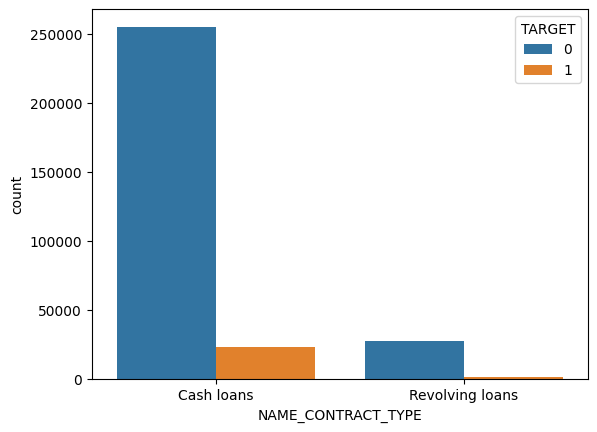

In [74]:
sns.countplot(data=app_score_col_rmvd, x='NAME_CONTRACT_TYPE', hue='TARGET')

In [75]:
data_pct = app_score_col_rmvd[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'], as_index=False).mean().sort_values(by='TARGET',ascending=False)

In [76]:
data_pct

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


In [77]:
data_pct['PCT'] = data_pct['TARGET'] * 100

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

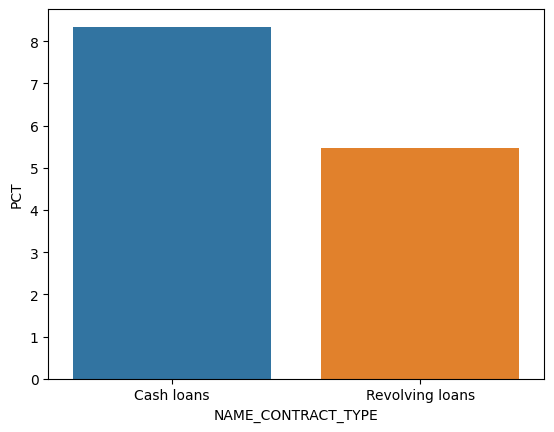

In [78]:
sns.barplot(data=data_pct, x='NAME_CONTRACT_TYPE', y='PCT')

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

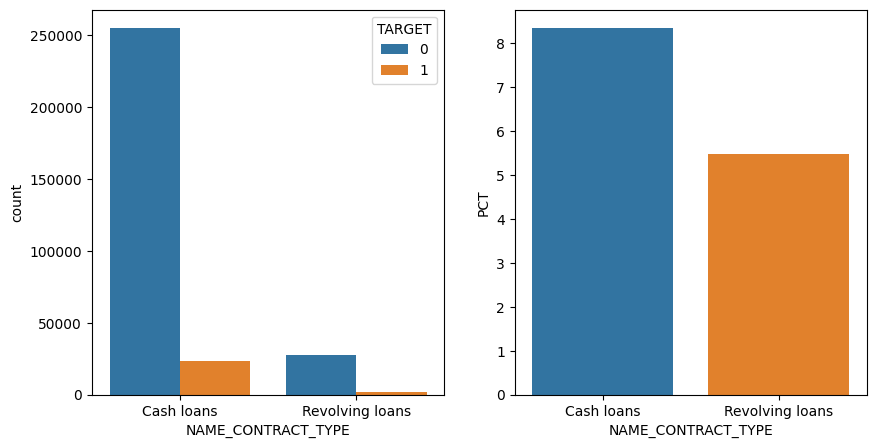

In [79]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmvd, x='NAME_CONTRACT_TYPE', hue='TARGET')

plt.subplot(1,2,2)
sns.barplot(data=data_pct, x='NAME_CONTRACT_TYPE', y="PCT")

In [80]:
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

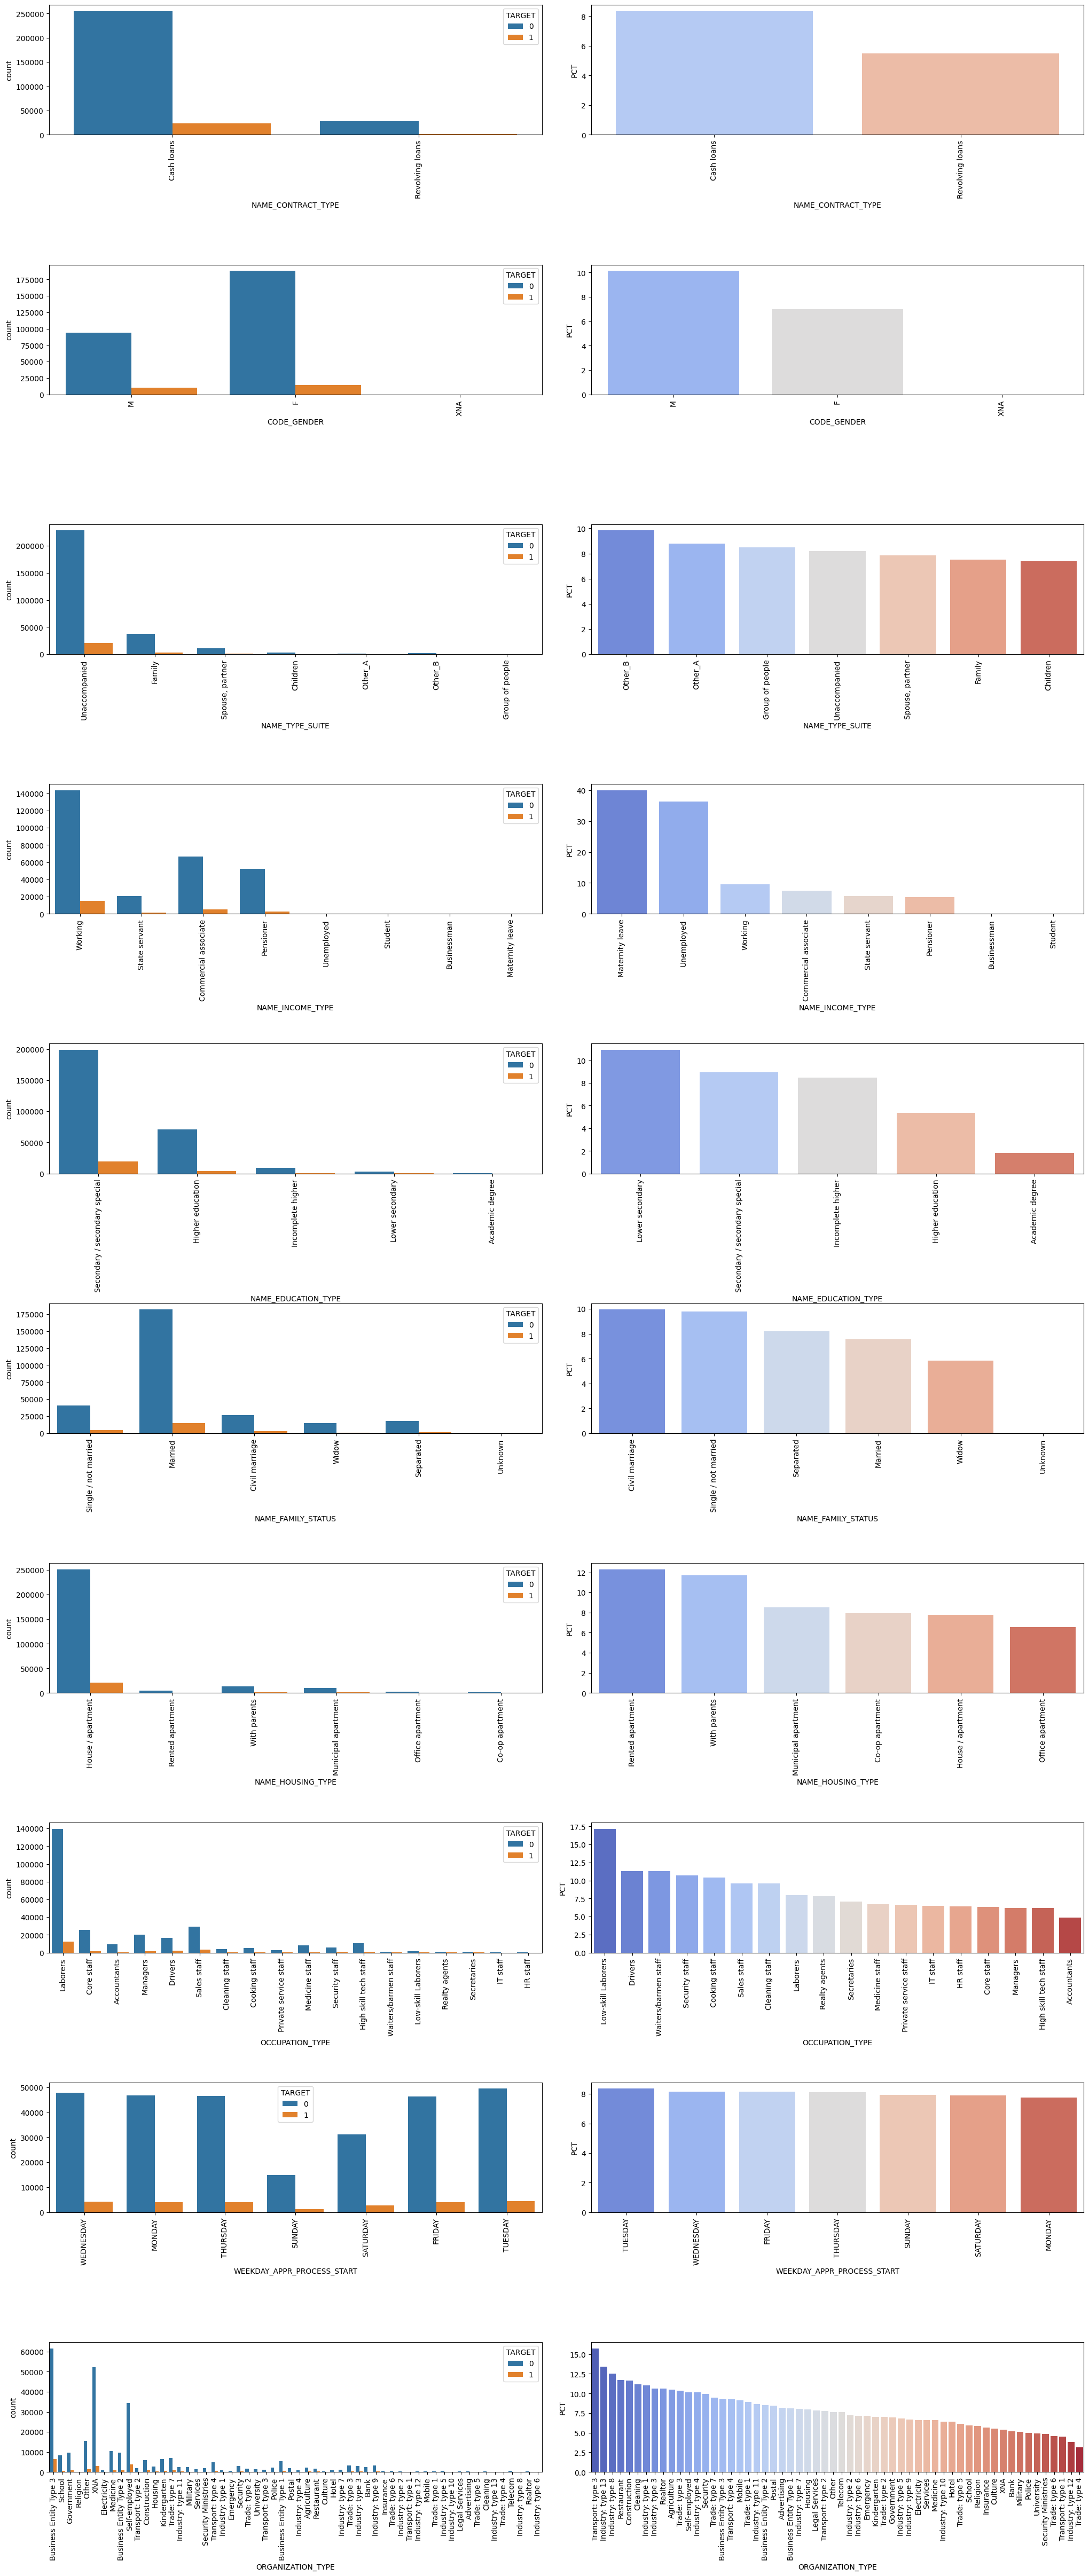

In [81]:
plt.figure(figsize=(25,60))
for i, var in enumerate(obj_var):
  data_pct = app_score_col_rmvd[[var, 'TARGET']].groupby([var], as_index=False).mean().sort_values(by='TARGET', ascending=False)
  data_pct['PCT'] = data_pct['TARGET'] * 100

  plt.subplot(10, 2, i+i+1)
  plt.subplots_adjust(wspace=0.1, hspace=1)
  sns.countplot(data=app_score_col_rmvd, x=var, hue='TARGET')
  plt.xticks(rotation=90)

  plt.subplot(10,2, i+i+2)
  sns.barplot(data=data_pct, x=var, y='PCT', palette='coolwarm')
  plt.xticks(rotation=90)

In [82]:
app_score_col_rmvd['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [83]:
app_score_col_rmvd.dtypes.value_counts()

float64     19
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [84]:
num_var = app_score_col_rmvd.select_dtypes(include=['float64', 'int64']).columns
num_cat_var = app_score_col_rmvd.select_dtypes(include=['float64', 'int64', 'category']).columns
len(num_var)

34

In [85]:
num_data = app_score_col_rmvd[num_var]
defaulters = num_data[num_data['TARGET']==1]
repayers = num_data[num_data['TARGET']==0]
repayers.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_FAMMEMBERS
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,...,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0


In [86]:
defaulters[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL']].corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL
SK_ID_CURR,1.000000,-0.005144,-0.010165
CNT_CHILDREN,-0.005144,1.000000,0.004796
AMT_INCOME_TOTAL,-0.010165,0.004796,1.000000


In [87]:
defaulter_corr = defaulters.corr()

defaulter_corr_unstack = defaulter_corr.where(np.triu(np.ones(defaulter_corr.shape), k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1', 'level_1':'var2', 0:'corr'})

defaulter_corr_unstack.head(2)

<ipython-input-87-4fd773ff8769>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  defaulter_corr_unstack = defaulter_corr.where(np.triu(np.ones(defaulter_corr.shape), k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1', 'level_1':'var2', 0:'corr'})


,var1,var2,corr
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN


In [88]:
defaulter_corr_unstack['corr'] = abs(defaulter_corr_unstack['corr'])
defaulter_corr_unstack.dropna(subset=['corr']).sort_values(by=['corr'], ascending=False).head(2)

,var1,var2,corr
1134,CNT_FAMMEMBERS,CNT_FAM_MEMBERS,1.000000
838,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269


In [89]:
repayers_corr = repayers.corr()
repayers_corr_unstack = repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1', 'level_1':'var2', 0:'corr'})

repayers_corr_unstack.head(2)

<ipython-input-89-cfcfb189fc2a>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  repayers_corr_unstack = repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1', 'level_1':'var2', 0:'corr'})


,var1,var2,corr
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN


In [90]:
repayers_corr_unstack['corr'] = abs(repayers_corr_unstack['corr'])

repayers_corr_unstack.dropna(subset=['corr']).sort_values(by=['corr'], ascending=False).head(2)

,var1,var2,corr
1134,CNT_FAMMEMBERS,CNT_FAM_MEMBERS,1.000000
838,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508


In [91]:
num_data.head(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_FAMMEMBERS
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [92]:
amt_var = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

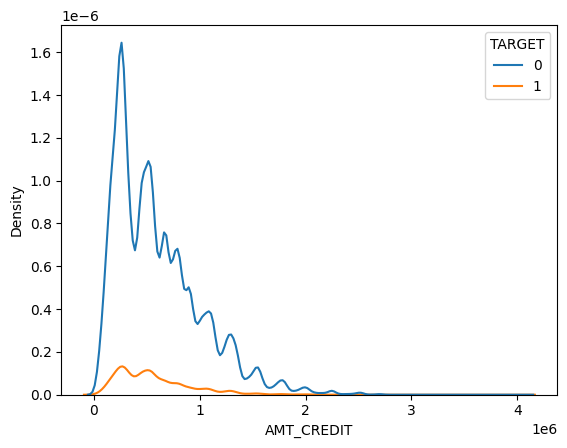

In [93]:
sns.kdeplot(data=num_data, x='AMT_CREDIT', hue='TARGET')

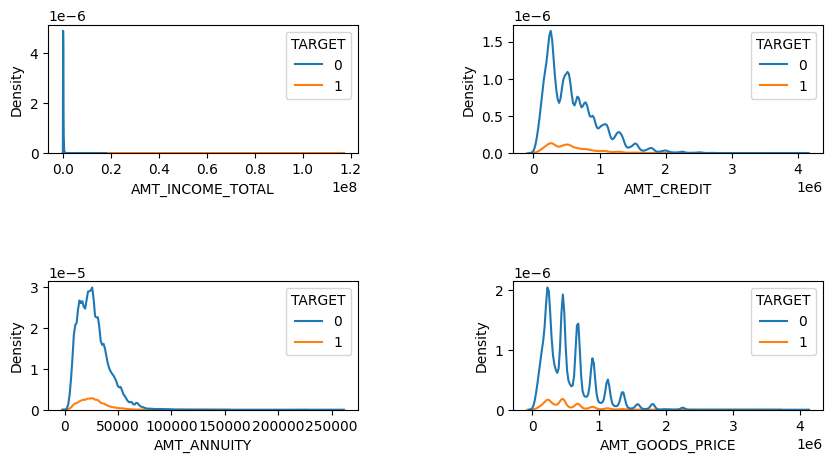

In [94]:
plt.figure(figsize=(10,5))

for i, col in enumerate(amt_var):
  plt.subplot(2,2,i+1)
  sns.kdeplot(data=num_data, x=col, hue='TARGET')
  plt.subplots_adjust(wspace=0.5, hspace=1)



<Axes: xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

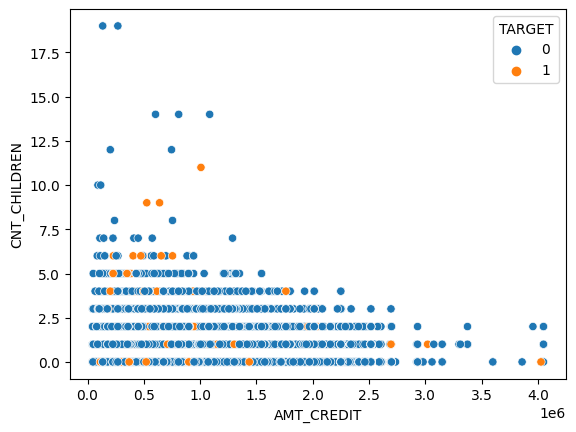

In [95]:
sns.scatterplot(data=num_data, x='AMT_CREDIT', y='CNT_CHILDREN', hue='TARGET')

In [96]:
amt_var = num_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]

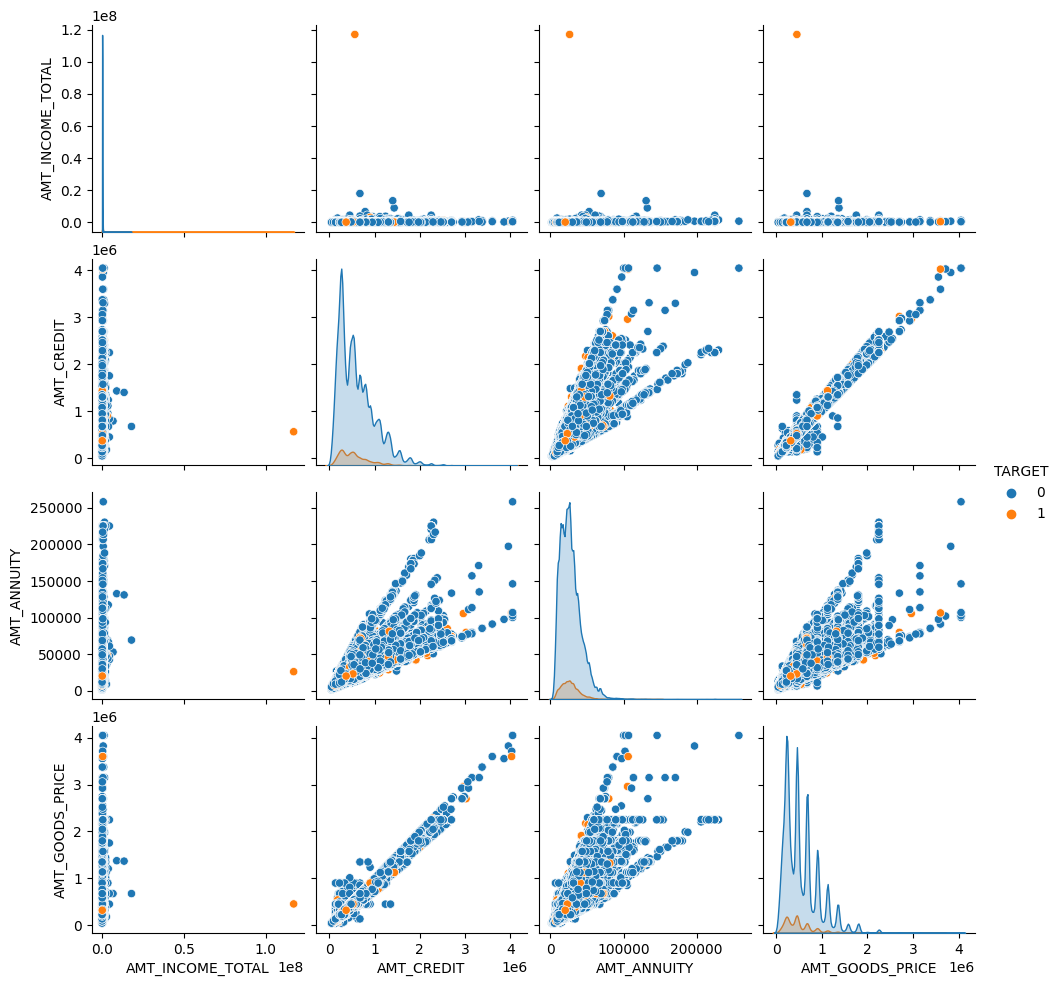

In [97]:
sns.pairplot(data=amt_var, hue='TARGET')


In [98]:
null_count = pd.DataFrame(prev_app.isnull().sum().sort_values(ascending=False) / prev_app.shape[0]*100).reset_index().rename(columns={'index':'var', 0:'count_pct'})


In [99]:
var_msng_ge_40 = list(null_count[null_count['count_pct']>=40]['var'])
var_msng_ge_40

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [100]:
nva_cols = var_msng_ge_40+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
len(nva_cols)

15

In [101]:
len(prev_app.columns)

37

In [103]:
prev_app_nva_col_rmvd = prev_app.drop(labels=nva_cols, axis=1)


In [104]:
len(prev_app_nva_col_rmvd.columns)

22

In [105]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False) / prev_app_nva_col_rmvd.shape[0]*100

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_GOODS_CATEGORY        0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
SK_ID_PREV                 0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_CURR                 0.000000
NAME_PAYMENT_TYPE          0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
CODE_REJECT_REASON         0.000000
dtype: float64

In [106]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].agg(func=['mean', 'median'])

mean      227847.279283
median    112320.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [107]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEDIAN'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())

In [108]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEAN'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mean())


In [109]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MODE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mode()[0])

In [110]:
gp_cols = ['AMT_GOODS_PRICE','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']

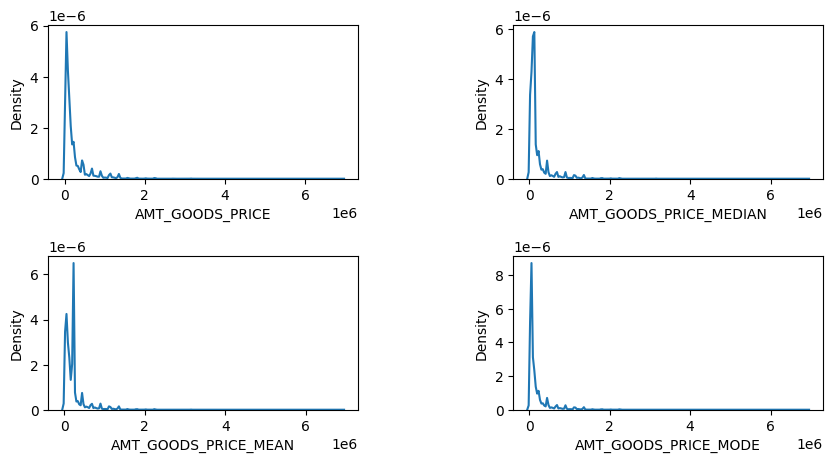

In [111]:
plt.figure(figsize=(10,5))

for i, col in enumerate(gp_cols):
  plt.subplot(2,2,i+1)
  sns.kdeplot(data=prev_app_nva_col_rmvd, x=col)
  plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [112]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())

In [113]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

0

In [ ]:
prev_app_nva_col_rmvd['AMT_ANNUITY'].agg(['mean','median', 'max'])


In [114]:
prev_app_nva_col_rmvd['AMT_ANNUITY'] = prev_app_nva_col_rmvd['AMT_ANNUITY'].fillna(prev_app_nva_col_rmvd['AMT_ANNUITY'].median())

In [115]:
prev_app_nva_col_rmvd['CNT_PAYMENT'].agg(func=['mean','median','max'])

prev_app_nva_col_rmvd[prev_app_nva_col_rmvd['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
dtype: int64

In [116]:
prev_app_nva_col_rmvd['CNT_PAYMENT'] = prev_app_nva_col_rmvd['CNT_PAYMENT'].fillna(0)

In [117]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)

PRODUCT_COMBINATION       346
AMT_CREDIT                  1
SK_ID_PREV                  0
NAME_GOODS_CATEGORY         0
AMT_GOODS_PRICE_MEAN        0
AMT_GOODS_PRICE_MEDIAN      0
NAME_YIELD_GROUP            0
CNT_PAYMENT                 0
NAME_SELLER_INDUSTRY        0
SELLERPLACE_AREA            0
CHANNEL_TYPE                0
NAME_PRODUCT_TYPE           0
NAME_PORTFOLIO              0
NAME_CLIENT_TYPE            0
SK_ID_CURR                  0
CODE_REJECT_REASON          0
NAME_PAYMENT_TYPE           0
DAYS_DECISION               0
NAME_CONTRACT_STATUS        0
NAME_CASH_LOAN_PURPOSE      0
AMT_GOODS_PRICE             0
AMT_APPLICATION             0
AMT_ANNUITY                 0
NAME_CONTRACT_TYPE          0
AMT_GOODS_PRICE_MODE        0
dtype: int64

In [118]:
prev_app_nva_col_rmvd = prev_app_nva_col_rmvd.drop(labels=['AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE'],axis=1)

In [120]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)

PRODUCT_COMBINATION       346
AMT_CREDIT                  1
NAME_CLIENT_TYPE            0
NAME_YIELD_GROUP            0
CNT_PAYMENT                 0
NAME_SELLER_INDUSTRY        0
SELLERPLACE_AREA            0
CHANNEL_TYPE                0
NAME_PRODUCT_TYPE           0
NAME_PORTFOLIO              0
NAME_GOODS_CATEGORY         0
SK_ID_PREV                  0
SK_ID_CURR                  0
NAME_PAYMENT_TYPE           0
DAYS_DECISION               0
NAME_CONTRACT_STATUS        0
NAME_CASH_LOAN_PURPOSE      0
AMT_GOODS_PRICE             0
AMT_APPLICATION             0
AMT_ANNUITY                 0
NAME_CONTRACT_TYPE          0
CODE_REJECT_REASON          0
dtype: int64

In [121]:
merged_df = pd.merge(app_score_col_rmvd,prev_app_nva_col_rmvd,how='inner',on='SK_ID_CURR')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


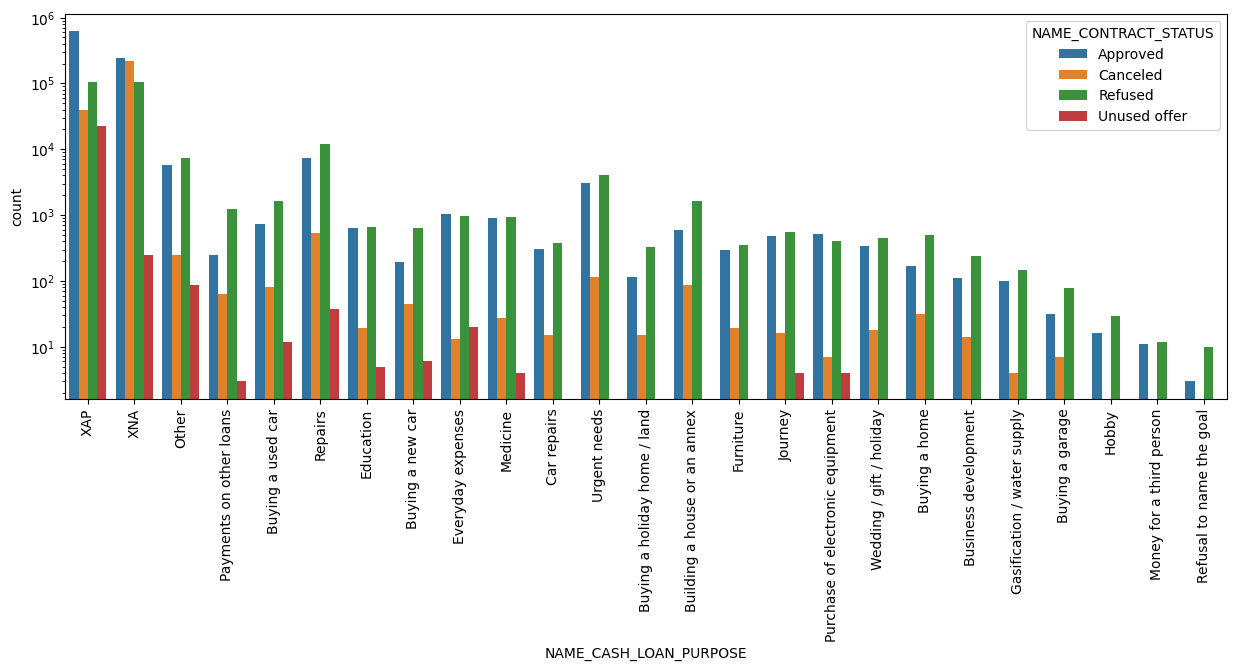

In [122]:
plt.figure(figsize=(15,5))
sns.countplot(data=merged_df,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.yscale('log')

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

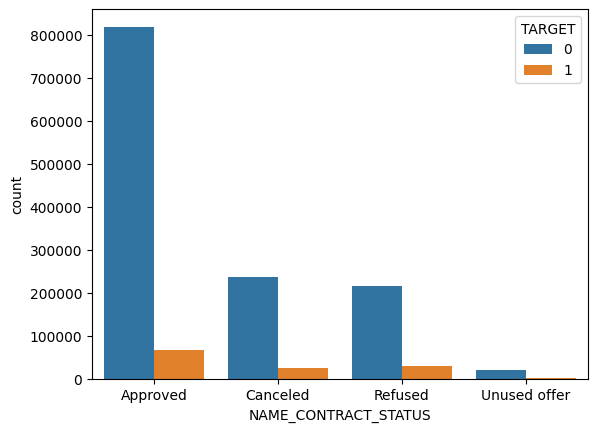

In [123]:
sns.countplot(data=merged_df, x='NAME_CONTRACT_STATUS',hue='TARGET')

In [124]:
merged_agg = merged_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size().reset_index().rename(columns={0:'counts'})
sum_df  = merged_agg.groupby(['NAME_CONTRACT_STATUS'])['counts'].sum().reset_index()

In [125]:
merged_agg_2 = pd.merge(merged_agg,sum_df,how='left',on='NAME_CONTRACT_STATUS')
merged_agg_2['pct'] = round(merged_agg_2['counts_x']/merged_agg_2['counts_y']*100,2)
merged_agg_2

,NAME_CONTRACT_STATUS,TARGET,counts_x,counts_y,pct
0,Approved,0,818856,886099,92.41
1,Approved,1,67243,886099,7.59
2,Canceled,0,235641,259441,90.83
3,Canceled,1,23800,259441,9.17
4,Refused,0,215952,245390,88.00
5,Refused,1,29438,245390,12.00
6,Unused offer,0,20892,22771,91.75
7,Unused offer,1,1879,22771,8.25


<ipython-input-126-418096ff2513>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

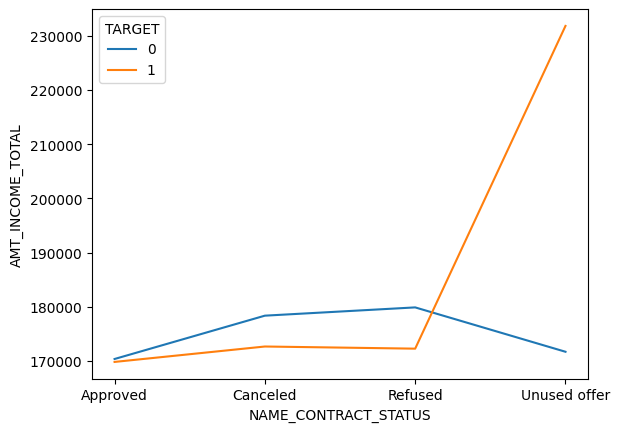

In [126]:
sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')